### Problem Statement:

Objective is to analyze the dataset to identify patterns related to road conditions, weather conditions, time of day, and other factors contributing to traffic accidents. Additionally, you are required to visualize accident hotspots and explore the relationships between variables.

### Data Loading

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("C:/Users/Aakash/Documents/Angular/Intern/Accidents.csv")

In [4]:
df = pd.DataFrame(data)
df.head(10)

,Accident_Index,Number_of_Vehicles,Number_of_Casualties,Date,Time,Speed_limit,Road_conditions,Weather_conditions,Day,Road_type,Light_conditions
0,197901A1SEE71,2,1,1979-01-01,18:20,50.0,Snow,Unknown,Monday,Dual carriageway,Darkness lights lit
1,197901A2JDW40,1,1,1979-02-01,09:15,30.0,Snow,Unknown,Tuesday,Unknown,Daylight
2,197901A4IJV90,2,1,1979-04-01,08:45,30.0,Snow,Unknown,Thursday,Unknown,Daylight
3,197901A4NIE33,2,1,1979-04-01,13:40,30.0,Wet,Unknown,Thursday,Unknown,Daylight
4,197901A4SKO47,2,1,1979-04-01,18:50,30.0,Wet,Unknown,Thursday,Unknown,Darkness lights lit
5,197901A5CKE54,2,1,1979-05-01,02:50,40.0,Snow,Unknown,Friday,Dual carriageway,Darkness lights lit
6,197901A5UJC75,2,1,1979-05-01,20:45,30.0,Wet,Unknown,Friday,Single carriageway,Darkness lights lit
7,197901A6ODP50,2,1,1979-06-01,14:15,70.0,Snow,Unknown,Saturday,Unknown,Daylight
8,197901A6VEC34,2,1,1979-06-01,21:20,30.0,Wet,Unknown,Saturday,Roundabout,Darkness lights lit
9,197901A7PDD49,2,1,1979-07-01,15:15,30.0,Wet,Rain,Sunday,Unknown,Daylight


### Data Exploration

In [5]:
df.shape

(827861, 11)

In [6]:
df.describe()

,Number_of_Vehicles,Number_of_Casualties,Speed_limit
count,827861.000000,827861.000000,827861.000000
mean,1.986178,1.047212,33.340934
std,0.311600,0.253509,9.278129
min,1.000000,1.000000,0.000000
25%,2.000000,1.000000,30.000000
50%,2.000000,1.000000,30.000000
75%,2.000000,1.000000,30.000000
max,13.000000,60.000000,660.000000


In [7]:
df.nunique()

Accident_Index          827861
Number_of_Vehicles          12
Number_of_Casualties        14
Date                     14609
Time                      1438
Speed_limit                 36
Road_conditions              6
Weather_conditions          10
Day                          7
Road_type                    6
Light_conditions             3
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827861 entries, 0 to 827860
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Accident_Index        827861 non-null  object 
 1   Number_of_Vehicles    827861 non-null  int64  
 2   Number_of_Casualties  827861 non-null  int64  
 3   Date                  827861 non-null  object 
 4   Time                  827861 non-null  object 
 5   Speed_limit           827861 non-null  float64
 6   Road_conditions       827861 non-null  object 
 7   Weather_conditions    827861 non-null  object 
 8   Day                   827861 non-null  object 
 9   Road_type             827861 non-null  object 
 10  Light_conditions      827861 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 69.5+ MB


### Data Cleaning

In [9]:
df.isnull().sum()

Accident_Index          0
Number_of_Vehicles      0
Number_of_Casualties    0
Date                    0
Time                    0
Speed_limit             0
Road_conditions         0
Weather_conditions      0
Day                     0
Road_type               0
Light_conditions        0
dtype: int64

In [10]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

# Display duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [Accident_Index, Number_of_Vehicles, Number_of_Casualties, Date, Time, Speed_limit, Road_conditions, Weather_conditions, Day, Road_type, Light_conditions]
Index: []


In [21]:
# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Convert Time column to datetime format (without seconds)
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M').dt.time

# Display the updated DataFrame
print(data.head())


  Accident_Index  Number_of_Vehicles  Number_of_Casualties       Date  \
0  197901A1SEE71                   2                     1 1979-01-01   
1  197901A2JDW40                   1                     1 1979-02-01   
2  197901A4IJV90                   2                     1 1979-04-01   
3  197901A4NIE33                   2                     1 1979-04-01   
4  197901A4SKO47                   2                     1 1979-04-01   

       Time  Speed_limit Road_conditions Weather_conditions       Day  \
0  18:20:00         50.0            Snow            Unknown    Monday   
1  09:15:00         30.0            Snow            Unknown   Tuesday   
2  08:45:00         30.0            Snow            Unknown  Thursday   
3  13:40:00         30.0             Wet            Unknown  Thursday   
4  18:50:00         30.0             Wet            Unknown  Thursday   

          Road_type     Light_conditions  
0  Dual carriageway  Darkness lights lit  
1           Unknown             Dayl

### Data Visualization & Interpretation

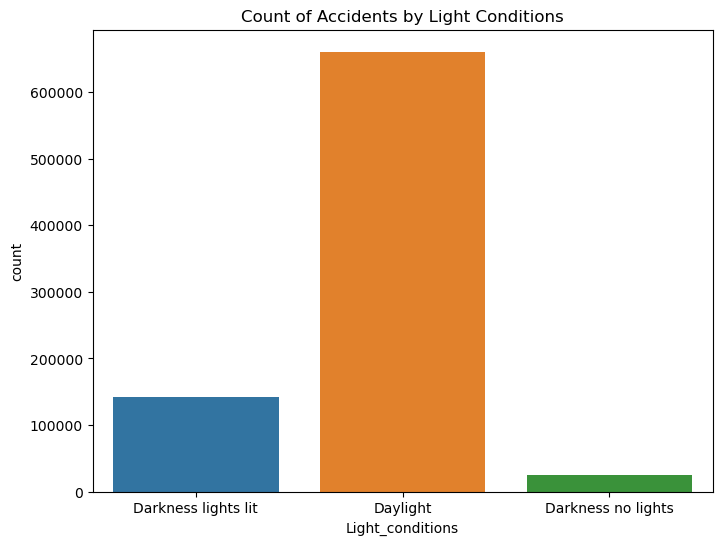

In [13]:
# Count plot for weather conditions
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='Light_conditions')
plt.title('Count of Accidents by Light Conditions')
plt.show()

The Count plot illustrates the distribution of traffic accidents across various light conditions. Each bar represents the count of accidents associated with a specific light condition, such as daylight, darkness with streetlights lit, or darkness with no streetlights. By examining the heights of the bars, one can discern the frequency of accidents under each light condition. This visualization enables the identification of potential patterns or correlations between light conditions and accident occurrences, aiding in the formulation of targeted interventions or safety measures to mitigate accidents under specific lighting circumstances.

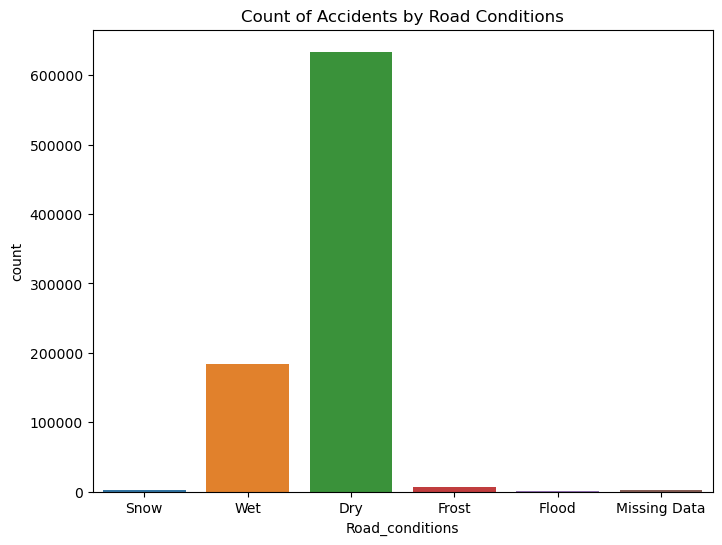

In [14]:
# Count plot for weather conditions
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='Road_conditions')
plt.title('Count of Accidents by Road Conditions')
plt.show()

The count plot illustrates the frequency of traffic accidents categorized by road conditions. Each bar represents the number of accidents occurring under specific road conditions such as dry, wet, or icy. This visualization helps identify patterns and correlations between road conditions and accident occurrences, guiding interventions to improve road safety.

Text(0, 0.5, 'Count')

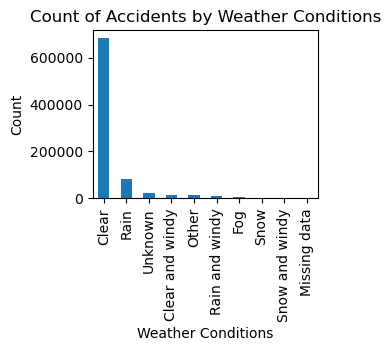

In [46]:
weather_conditions_counts = data['Weather_conditions'].value_counts()

# Weather conditions
plt.subplot(2, 2, 1)
weather_conditions_counts.plot(kind='bar')
plt.title('Count of Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')


Each bar represents the number of accidents occurring under a specific weather condition, such as rain, snow, or clear weather. The title, x-axis label ('Weather Conditions'), and y-axis label ('Count') help provide context and interpretation for the plot. This visualization facilitates the comparison of accident frequencies across different weather conditions, aiding in understanding the impact of weather on road safety.

Text(0, 0.5, 'Count')

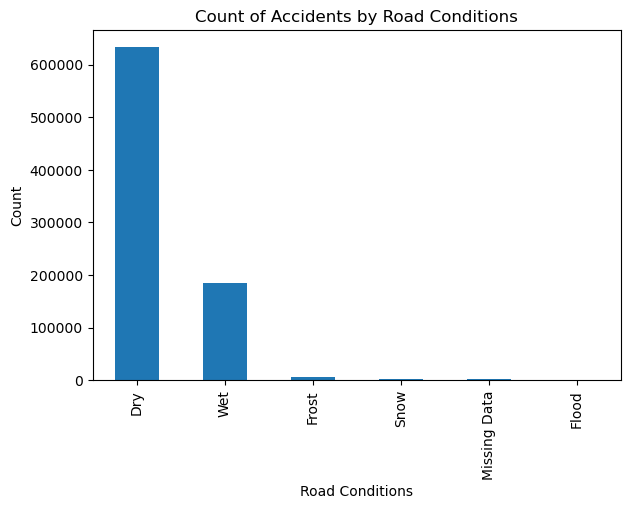

In [18]:
# Calculate counts for each contributing factor
road_conditions_counts = data['Road_conditions'].value_counts()

# Plot bar graphs for contributing factors
plt.figure(figsize=(15, 10))

# Road conditions
plt.subplot(2, 2, 1)
road_conditions_counts.plot(kind='bar')
plt.title('Count of Accidents by Road Conditions')
plt.xlabel('Road Conditions')
plt.ylabel('Count')

Each bar represents the number of accidents occurring under specific road conditions such as dry, wet, or icy. The title of the plot ('Count of Accidents by Road Conditions'), along with the x-axis label ('Road Conditions') and y-axis label ('Count'), provides clear context for interpretation. This visualization enables easy comparison of accident frequencies across different road conditions, facilitating the identification of patterns and informing targeted interventions to improve road safety.

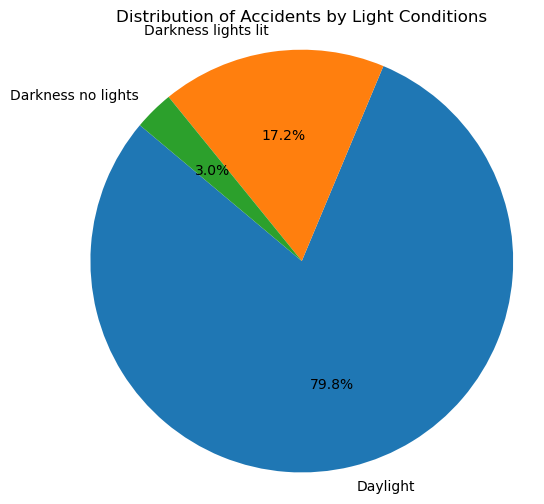

In [29]:
# Calculate the count of accidents for each light condition
light_conditions_counts = data['Light_conditions'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
plt.pie(light_conditions_counts, labels=light_conditions_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Accidents by Light Conditions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Each slice of the pie represents the proportion of accidents occurring under a specific light condition, such as daylight, darkness with streetlights lit, or darkness with no streetlights. The percentage value displayed on each slice (%1.1f%%) indicates the proportion of accidents relative to the total. The title of the pie chart ('Distribution of Accidents by Light Conditions') provides context, and the 'equal' aspect ratio ensures that the pie is drawn as a circle. This visualization offers a concise representation of accident distribution across various light conditions, aiding in understanding the impact of lighting on road safety.

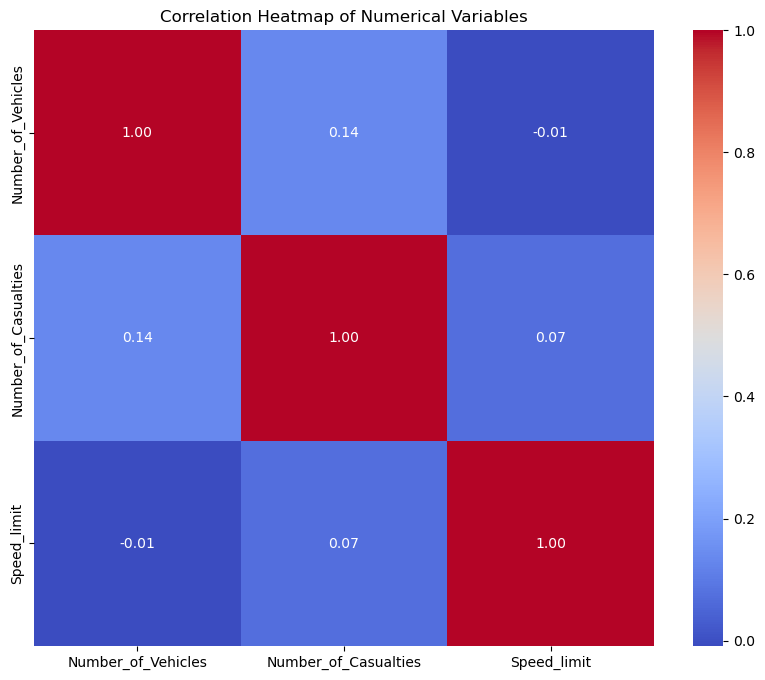

In [40]:
# Select numerical columns for correlation analysis
numerical_columns = ['Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit']

# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Each cell in the heatmap represents the correlation coefficient between two numerical variables. The color intensity of each cell indicates the strength and direction of the correlation, with warmer colors (e.g., red) representing positive correlations and cooler colors (e.g., blue) representing negative correlations. The annotation within each cell displays the correlation coefficient value, facilitating interpretation. The title of the heatmap ('Correlation Heatmap of Numerical Variables') provides context, and the color map ('coolwarm') enhances visualization. This heatmap allows for the quick identification of relationships between numerical variables, aiding in data exploration and analysis.